<a href="https://colab.research.google.com/github/ixd-ai-hub/Research-Ground/blob/project%2FCU-865d7na0b-chat-emotion-analyzer/MELD_EDA_4_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Changes done:


* Deleted image.png
* Deleted party test dialogue
* Most common dialgue in each emotion
* Max span for each emotion
* Delete additional data columns- test
* Deleted my code for continuous emotion span



### Utils

#### Libraries

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import functools
from collections import Counter, defaultdict
from datetime import time, timedelta
from typing import List, Dict, Any

import pandas as pd
import numpy as np
from statistics import mode
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt

#### Functions

In [ ]:
# Decorator function
def add_labels_and_title(title, x_label, y_label):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            # Call the original function to create the plot
            plot = func(*args, **kwargs)

            # Add labels and title
            plt.xlabel(x_label)
            plt.ylabel(y_label)
            plt.title(title)

            return plot  # Return the plot with labels and title

        return wrapper
    return decorator

In [ ]:
def plot_hist(df: pd.DataFrame, column: str, x_label: str="", y_label: str="", title: str="") -> None:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, bins=50)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


# General Data Statistics

## Initialization

In [ ]:
# File path
file_path ="/content/drive/MyDrive/MELD_folder/MELD_test_sent_emo.csv"

In [ ]:
# reading csv file
df = pd.read_csv(file_path)
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all you’re coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. That’s so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"


## Info about the dataframe

In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2610 rows and 11 columns


In [ ]:
print(f"data table columns : {df.columns}")

data table columns : Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')


Column Specification

| Column Name  | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Sr No.       | Serial numbers of the utterances mainly for referencing the utterances in case of different versions or multiple copies with different subsets |
| Utterance    | Individual utterances from EmotionLines as a string.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| Speaker      | Name of the speaker associated with the utterance.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Emotion      | The emotion (neutral, joy, sadness, anger, surprise, fear, disgust) expressed by the speaker in the utterance.                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| Sentiment    | The sentiment (positive, neutral, negative) expressed by the speaker in the utterance.                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Dialogue_ID  | The index of the dialogue starting from 0.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Utterance_ID | The index of the particular utterance in the dialogue starting from 0.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Season       | The season no. of Friends TV Show to which a particular utterance belongs.                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Episode      | The episode no. of Friends TV Show in a particular season to which the utterance belongs.                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| StartTime    | The starting time of the utterance in the given episode in the format 'hh:mm:ss,ms'.                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EndTime      | The ending time of the utterance in the given episode in the format 'hh:mm:ss,ms'.                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        2610 non-null   int64 
 1   Utterance     2610 non-null   object
 2   Speaker       2610 non-null   object
 3   Emotion       2610 non-null   object
 4   Sentiment     2610 non-null   object
 5   Dialogue_ID   2610 non-null   int64 
 6   Utterance_ID  2610 non-null   int64 
 7   Season        2610 non-null   int64 
 8   Episode       2610 non-null   int64 
 9   StartTime     2610 non-null   object
 10  EndTime       2610 non-null   object
dtypes: int64(5), object(6)
memory usage: 224.4+ KB


In [ ]:
df.describe()

,Sr No.,Dialogue_ID,Utterance_ID,Season,Episode
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,1382.552107,140.368582,5.918774,4.804981,12.497318
std,793.009903,79.549222,4.991015,2.247074,7.224232
min,1.000000,0.000000,0.000000,1.000000,1.000000
25%,700.250000,72.000000,2.000000,3.000000,6.000000
50%,1371.500000,139.000000,5.000000,5.000000,12.000000
75%,2068.500000,206.750000,9.000000,6.000000,20.000000
max,2764.000000,279.000000,32.000000,9.000000,25.000000


In [ ]:
len(df)-len(df.drop_duplicates())

0

In [ ]:
# only categorical variables are considered
df[['Emotion','Sentiment','Speaker','Utterance']].nunique()

Emotion         7
Sentiment       3
Speaker       100
Utterance    2398
dtype: int64

In [ ]:
df['Sr No.'].nunique()
# Sr No. is the primary key

2610

In [ ]:
utt_ids = df[["Utterance_ID","Dialogue_ID"]]

# Here both Utterance_Id and Dialogue_ID can be taken as the primary key

In [ ]:
utt_ids.loc[utt_ids.duplicated(),:].sort_values("Dialogue_ID").count()

Utterance_ID    0
Dialogue_ID     0
dtype: int64

In [ ]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all you’re coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. That’s so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"


## Add Additional Data Columns

In [ ]:
def add_additional_columns(df):
    datafrm = df.copy()

    # utterance string length
    # datafrm["Utterance_length"] = datafrm["Utterance"].str.len()

    # number of words uttered
    datafrm["Words_uttered"] = datafrm["Utterance"].apply(lambda sentnece: len(sentnece.split()))

    # utterance time
    datafrm['Utterance_time'] = (pd.to_datetime(datafrm.EndTime) - pd.to_datetime(datafrm.StartTime))

    # Convert the timedelta column to timedelta type
    datafrm['Utterance_time'] = pd.to_timedelta(datafrm['Utterance_time'])

    # Extract seconds and milliseconds
    datafrm['seconds'] = datafrm['Utterance_time'].dt.total_seconds()  # Extract seconds as a float
    datafrm['milliseconds'] = datafrm['Utterance_time'].dt.microseconds//1000 # Extract milliseconds as an integer

    return datafrm


In [ ]:
dataframe = add_additional_columns(df)
dataframe.head(10)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Words_uttered,Utterance_time,seconds,milliseconds
0,1,Why do all you’re coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378",11,0 days 00:00:02.251000,2.251,251
1,2,Oh. That’s so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385",22,0 days 00:00:06.756000,6.756,756
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520",2,0 days 00:00:01.167000,1.167,167
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146",7,0 days 00:00:01.377000,1.377,377
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833",1,0 days 00:00:00.687000,0.687,687
5,21,"Push 'em out, push 'em out, harder, harder.",Joey,joy,positive,1,2,1,23,"00:10:46,979","00:10:50,148",8,0 days 00:00:03.169000,3.169,169
6,22,"Push 'em out, push 'em out, way out!",Joey,joy,positive,1,3,1,23,"00:10:50,316","00:10:52,609",8,0 days 00:00:02.293000,2.293,293
7,23,"Let's get that ball and really move, hey, hey,...",Joey,joy,positive,1,4,1,23,"00:10:52,777","00:10:55,612",11,0 days 00:00:02.835000,2.835,835
8,24,"Let's— I was just—yeah, right.",Joey,joy,positive,1,5,1,23,"00:10:55,780","00:11:01,242",5,0 days 00:00:05.462000,5.462,462
9,25,Push!,Joey,joy,positive,1,6,1,23,"0:11:01,410","0:11:01,828",1,0 days 00:00:00.418000,0.418,418


## Waiting Time

In [ ]:
def waitingtimeCol(dataframe):
    timedf=dataframe.copy()
    timedf['StartTime'] = pd.to_datetime(timedf['StartTime'])
    timedf['EndTime'] = pd.to_datetime(timedf['EndTime'])

    # sort by dialogue id and start time
    timedf.sort_values(by=['Dialogue_ID','StartTime'], inplace=True)

    # group by dialogue id
    groupDialogue = timedf.groupby("Dialogue_ID")

    # shift the start time column up
    #  then get the difference
    timedf['Time_Difference'] = groupDialogue['StartTime'].shift(-1) - timedf['StartTime']

    # get the waiting time
    timedf['Reply_waiting_Time'] = timedf['Time_Difference'].sub(timedf['Utterance_time']).abs()

    # get the waiting time in miliseconds
    timedf['Reply_waiting_Time'] = timedf['Reply_waiting_Time'].dt.microseconds//1000 # Extract milliseconds as an integer

    return timedf


In [ ]:
dataframe = waitingtimeCol(dataframe)
dataframe.drop(['Time_Difference'], axis=1)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Words_uttered,Utterance_time,seconds,milliseconds,Reply_waiting_Time
0,1,Why do all you’re coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,2023-10-05 00:14:38.127,2023-10-05 00:14:40.378,11,0 days 00:00:02.251000,2.251,251,251.0
1,2,Oh. That’s so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,2023-10-05 00:14:40.629,2023-10-05 00:14:47.385,22,0 days 00:00:06.756000,6.756,756,968.0
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,2023-10-05 00:14:56.353,2023-10-05 00:14:57.520,2,0 days 00:00:01.167000,1.167,167,NaN
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,2023-10-05 00:10:44.769,2023-10-05 00:10:46.146,7,0 days 00:00:01.377000,1.377,377,0.0
4,20,Push!,Joey,joy,positive,1,1,1,23,2023-10-05 00:10:46.146,2023-10-05 00:10:46.833,1,0 days 00:00:00.687000,0.687,687,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,2760,"Yeah, I mean, come on Ross, no one will even n...",Rachel,neutral,neutral,279,11,6,4,2023-10-05 00:14:35.457,2023-10-05 00:14:40.211,18,0 days 00:00:04.754000,4.754,754,45.0
2606,2761,They’re not listening too me?,Ross,surprise,negative,279,12,6,4,2023-10-05 00:14:42.256,2023-10-05 00:14:43.840,5,0 days 00:00:01.584000,1.584,584,168.0
2607,2762,Of course they’re listening to you! Everybody ...,Rachel,neutral,neutral,279,13,6,4,2023-10-05 00:14:44.008,2023-10-05 00:14:48.511,10,0 days 00:00:04.503000,4.503,503,373.0
2608,2763,Monica you really think I should try this phas...,Ross,neutral,neutral,279,14,6,4,2023-10-05 00:14:48.138,2023-10-05 00:14:52.390,11,0 days 00:00:04.252000,4.252,252,168.0


In [ ]:
dataframe[['Dialogue_ID','StartTime','Reply_waiting_Time']][2:15]

,Dialogue_ID,StartTime,Reply_waiting_Time
2,0,2023-10-05 00:14:56.353,NaN
3,1,2023-10-05 00:10:44.769,0.0
4,1,2023-10-05 00:10:46.146,146.0
5,1,2023-10-05 00:10:46.979,168.0
6,1,2023-10-05 00:10:50.316,168.0
7,1,2023-10-05 00:10:52.777,168.0
8,1,2023-10-05 00:10:55.780,168.0
9,1,2023-10-05 00:11:01.410,0.0
10,1,2023-10-05 00:11:01.828,NaN
11,2,2023-10-05 00:07:26.446,168.0


# Visualizing

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def plot_pdf_box_plot(data, title='', x_axis_label='', y_axis_label=''):
    # Create a PDF plot using a histogram
    fig = px.histogram(data, nbins=50, marginal="box", title=title, labels={x_axis_label, y_axis_label})

    # Update the layout to customize the appearance
    fig.update_layout(
        xaxis_title=x_axis_label,
        yaxis_title=y_axis_label,
        boxmode='overlay',  # Display box plot overlay on the PDF plot
        showlegend=False     # Hide the legend
    )

    # Show the plot
    fig.show()

## Creating Dialog level dataframe

- dialog_df;
- [x] dialog_ID
- [x] #of speakers
- [x] #utterances
- [x] #emotions
- [x] #sentiments
- [x] total time period
- [x] avg. untt. per person
- [x] avg. time between untt.
- [x] all the emotions in the dialog as list
- [ ] common sentiment
- [ ] {emotion: # occurances}
    * {persion: [emotion]}
    * {emotion: avg. cont. uttr. of the emotion}

### Dialog level plots
#### Distribution plots
* [ ] speakers in a conversation violin plot with box plot
* [ ] utterances in a conversation violin plot with box plot
* [ ] emotions in a conversation histogram
* #sentiments in a conversation histogram
* total conversation time dist. violin plot with box plot
* avg. untt. per person dist. violin plot with box plot
* avg. time between untt. violin plot with box plot


#### Comparison and Correlation plots
* #speakers vs #emotions scatter plot and OLS fit


In [ ]:
# df_copy = df.copy()
# by_dialogue = df_copy.groupby('Dialogue_ID')

# # number of utterances (lines) per dialogue
# no_of_utterances = by_dialogue.Sentiment.mode()
# no_of_utterances

In [ ]:
def get_dialogue_df(df):
    df_copy = df.copy()
    by_dialogue = df_copy.groupby('Dialogue_ID')

    # number of utterances (lines) per dialogue
    no_of_utterances = by_dialogue.Utterance.size()

    # total number of words
    tot_words = by_dialogue.Words_uttered.sum()

    # dialogue duration (time spent for each utterance in each dialogue)
    dialogue_durations = by_dialogue['seconds'].sum()

    # mean time of a utterance of a dialogue
    mean_time = by_dialogue.seconds.mean()

    # Number of speakers in the dialogue
    speakers = by_dialogue.Speaker.nunique()

    # unique emotions
    emotions = by_dialogue.Emotion.unique()

    # number of unique emotions
    num_emotions = by_dialogue.Emotion.nunique()

    # unique sentiments
    sentiments = by_dialogue.Sentiment.unique()

    # Number od unique sentiments
    num_sentiments = by_dialogue.Sentiment.nunique()

    # average utterances per person
    avg_utt = no_of_utterances/speakers

    # most frequent emotion in the dialogue
    most_frequent_emotion = by_dialogue['Emotion'].agg(lambda x: x.value_counts().idxmax())

    # time between utternaces
    # mean_wait = by_dialogue.Reply_waiting_Time.sum()/(by_dialogue.Reply_waiting_Time.count()-1)

    # common emotion
    common_sentiment = by_dialogue['Sentiment'].apply(mode)

    dialogue_df = pd.DataFrame({
        'no_of_utterances': no_of_utterances,
        'speakers':speakers,
        'tot_words':tot_words,
        'mean_speech_time':mean_time,
        'dialogue_durations':dialogue_durations,
        'emotions':emotions,
        'num_emotions':num_emotions,
        'Most_Frequent_Emotion': most_frequent_emotion,
        'num_of_speakers':speakers,
        'sentiments':sentiments,
        'num_sentiments':num_sentiments,
        'Most_common_Sentiment':common_sentiment,
        'avg_utterances_per_speaker':avg_utt,
        # 'mean_waiting_time':mean_wait
        })
    return dialogue_df


In [ ]:
dialogue_df = get_dialogue_df(dataframe)
dialogue_df.head()

,no_of_utterances,speakers,tot_words,mean_speech_time,dialogue_durations,emotions,num_emotions,Most_Frequent_Emotion,num_of_speakers,sentiments,num_sentiments,Most_common_Sentiment,avg_utterances_per_speaker
Dialogue_ID,,,,,,,,,,,,,
0,3,2,35,3.391333,10.174,"[surprise, anger, neutral]",3,surprise,2,"[positive, negative, neutral]",3,positive,1.500000
1,8,1,42,2.273375,18.187,"[neutral, joy]",2,joy,1,"[neutral, positive]",2,positive,8.000000
2,11,2,63,1.851455,20.366,"[neutral, sadness, surprise, anger, joy]",5,neutral,2,"[neutral, negative, positive]",3,negative,5.500000
3,7,3,44,3.341571,23.391,"[neutral, fear, anger, disgust]",4,neutral,3,"[neutral, negative]",2,neutral,2.333333
4,9,3,85,2.386222,21.476,"[surprise, neutral, fear, disgust, anger]",5,surprise,3,"[positive, neutral, negative]",3,positive,3.000000


In [ ]:
dialogue_df.describe()
# count- no of Dialogues
# no_of_utterances= utterances per dialogue

,no_of_utterances,speakers,tot_words,mean_speech_time,dialogue_durations,num_emotions,num_of_speakers,num_sentiments,avg_utterances_per_speaker
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,9.321429,2.664286,76.553571,3.826786,30.846979,3.242857,2.664286,2.332143,3.656003
std,5.711421,1.088294,52.668137,7.875380,28.048372,1.340686,1.088294,0.682896,2.413464
min,1.000000,1.000000,1.000000,0.550500,1.042000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,2.000000,36.000000,2.435325,14.089750,2.000000,2.000000,2.000000,1.800000
50%,9.000000,2.000000,70.500000,2.961000,26.949000,3.000000,2.000000,2.000000,3.000000
75%,13.000000,3.000000,108.250000,3.810672,40.374500,4.000000,3.000000,3.000000,5.000000
max,33.000000,8.000000,396.000000,119.118500,314.927000,6.000000,8.000000,3.000000,20.000000


### Utterance

In [ ]:
plot_hist(df: pd.DataFrame, column: str, x_label: str="", y_label: str="", title: str="")

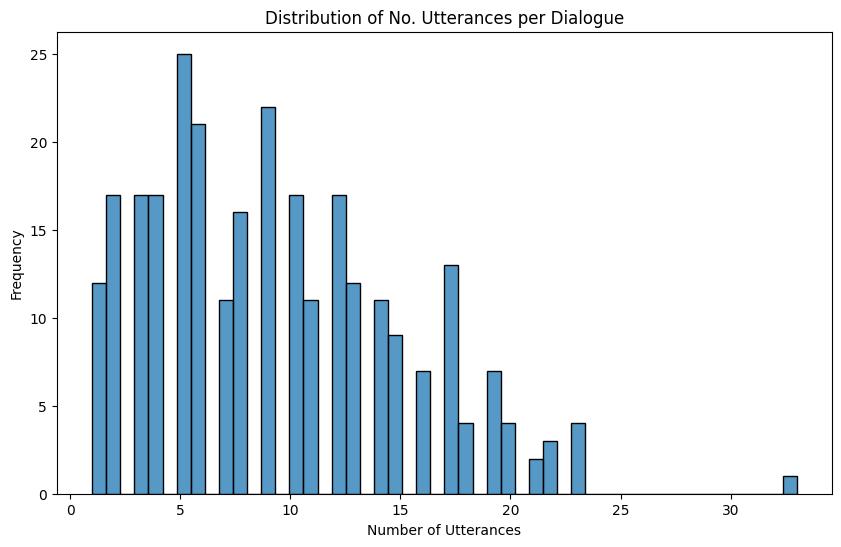

In [ ]:
plot_hist(dialogue_df,"no_of_utterances",'Number of Utterances',"Frequency",'Distribution of No. Utterances per Dialogue')


In [ ]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data=dialogue_df, x='no_of_utterances', bins=50)
# plt.title('Distribution of No. Utterances per Dialogue')
# plt.xlabel('Number of Utterances')
# plt.ylabel('Frequency')
# plt.show()


<Axes: xlabel='no_of_utterances'>

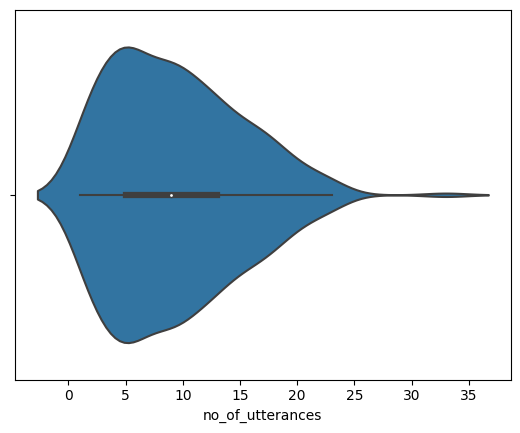

In [ ]:
sns.violinplot(x=dialogue_df.no_of_utterances)

<Axes: xlabel='no_of_utterances'>

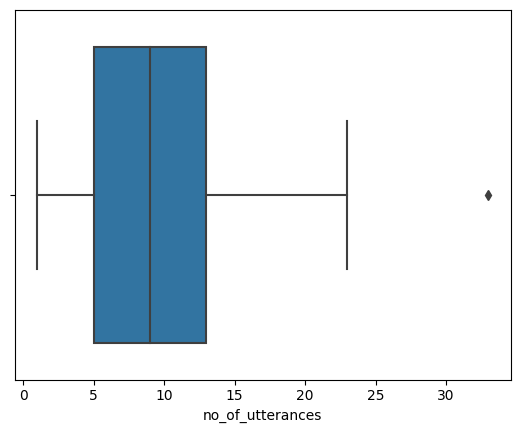

In [ ]:
sns.boxplot(x=dialogue_df.no_of_utterances)

### Word count

In [ ]:
plot_hist(dialogue_df,"no_of_utterances",'Number of Utterances',"Frequency",'Distribution of No. Utterances per Dialogue')


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='tot_words', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of No. words per Dialogue')

Text(0.5, 0, 'Number of Words')

Text(0, 0.5, 'Frequency')

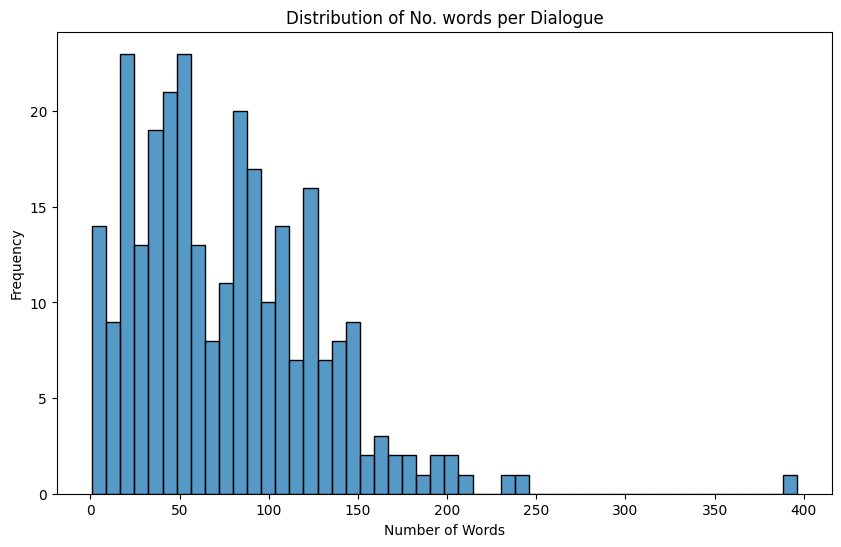

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dialogue_df, x='tot_words', bins=50)
plt.title('Distribution of No. words per Dialogue')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='tot_words'>

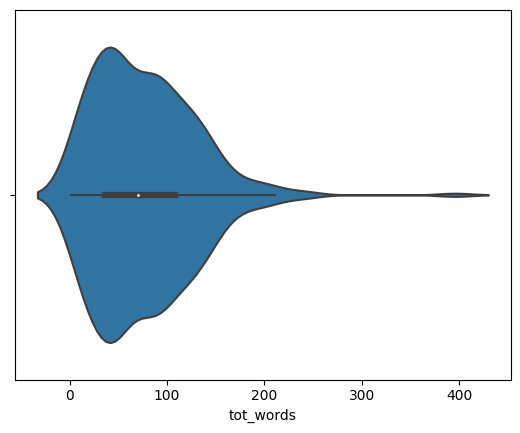

In [ ]:
sns.violinplot(x=dialogue_df.tot_words)

<Axes: xlabel='tot_words'>

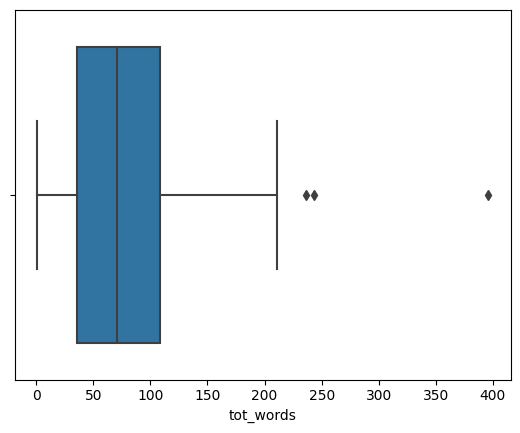

In [ ]:
sns.boxplot(x=dialogue_df.tot_words)

### Time

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='dialogue_durations', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Time For Utterances in a Dialogue')

Text(0.5, 0, 'Total Speech Time')

Text(0, 0.5, 'Frequency')

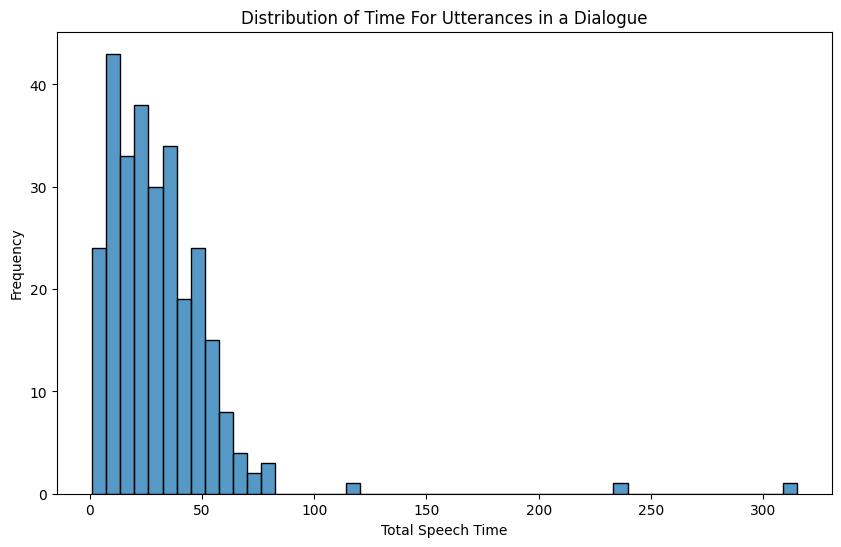

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dialogue_df, x='dialogue_durations', bins=50)
plt.title('Distribution of Time For Utterances in a Dialogue')
plt.xlabel('Total Speech Time')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='dialogue_durations'>

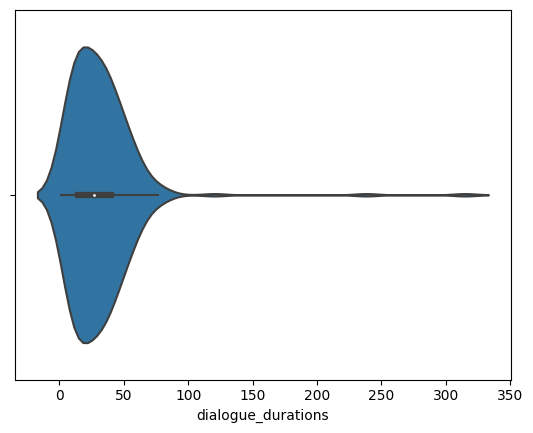

In [ ]:
sns.violinplot(x=dialogue_df.dialogue_durations)

<Axes: xlabel='dialogue_durations'>

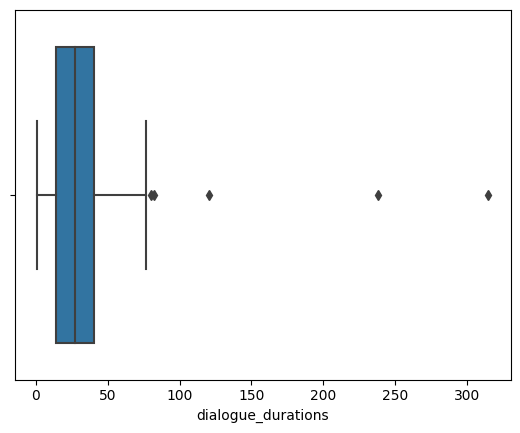

In [ ]:
sns.boxplot(x=dialogue_df.dialogue_durations)

### Parties

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='num_of_speakers', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of No. Speakers per Dialogue')

Text(0.5, 0, 'Number of Speakers in the Dialogue')

Text(0, 0.5, 'Frequency')

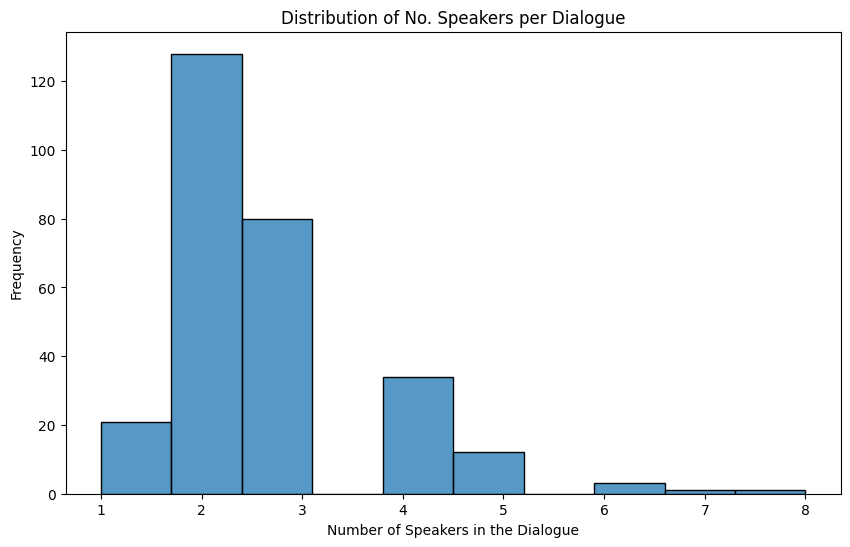

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dialogue_df, x='num_of_speakers', bins=10)
plt.title('Distribution of No. Speakers per Dialogue')
plt.xlabel('Number of Speakers in the Dialogue')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='speakers'>

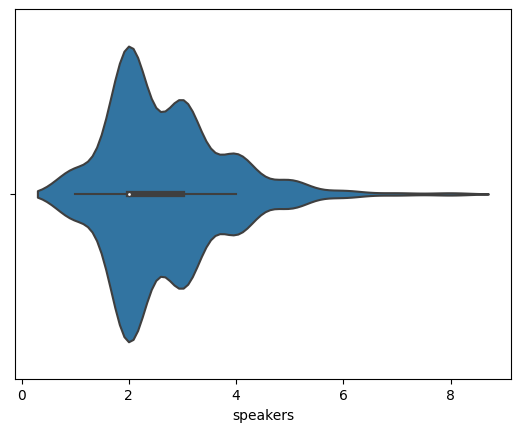

In [ ]:
sns.violinplot(x=dialogue_df["speakers"])

<Axes: xlabel='speakers'>

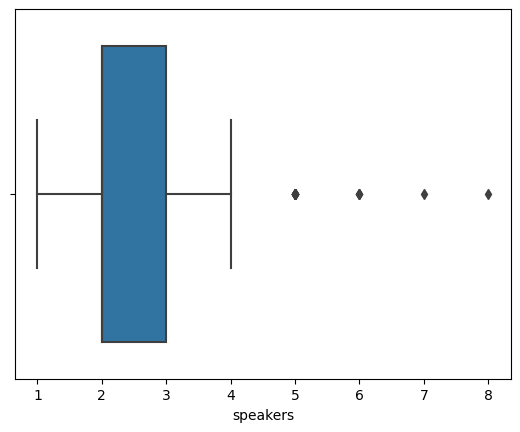

In [ ]:
sns.boxplot(x=dialogue_df.speakers)

### Emotions

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='num_emotions', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of No.Unique Emotions per Dialogue')

Text(0.5, 0, 'Total Number of Unique Emotions in the Dialogue')

Text(0, 0.5, 'Frequency')

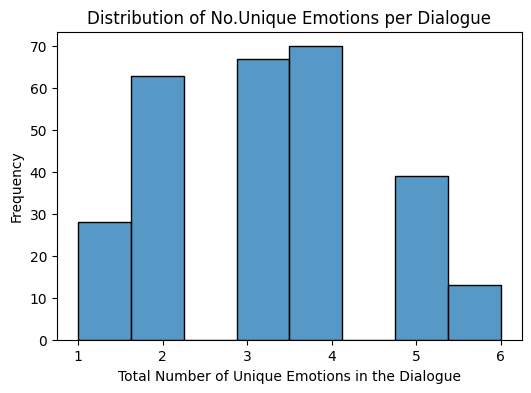

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(data=dialogue_df, x='num_emotions', bins=8)
plt.title('Distribution of No.Unique Emotions per Dialogue')
plt.xlabel('Total Number of Unique Emotions in the Dialogue')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='num_emotions'>

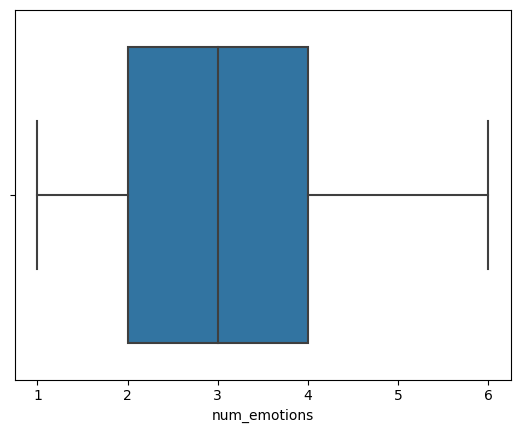

In [ ]:
sns.boxplot(x=dialogue_df.num_emotions)

<Axes: xlabel='num_emotions'>

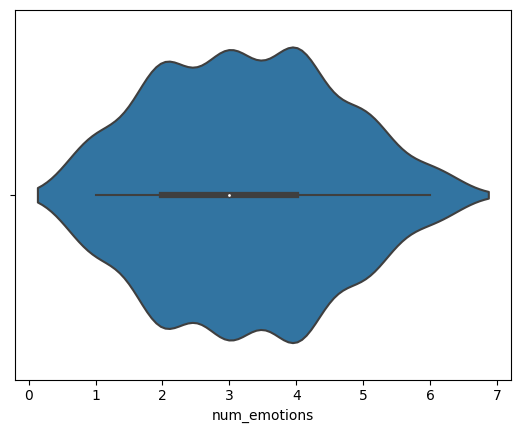

In [ ]:
sns.violinplot(x=dialogue_df.num_emotions)

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Most_Frequent_Emotion', ylabel='count'>

Text(0.5, 1.0, 'Most Frequent Emotions in Dialogues')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'neutral'),
  Text(1, 0, 'joy'),
  Text(2, 0, 'anger'),
  Text(3, 0, 'surprise'),
  Text(4, 0, 'sadness'),
  Text(5, 0, 'disgust')])

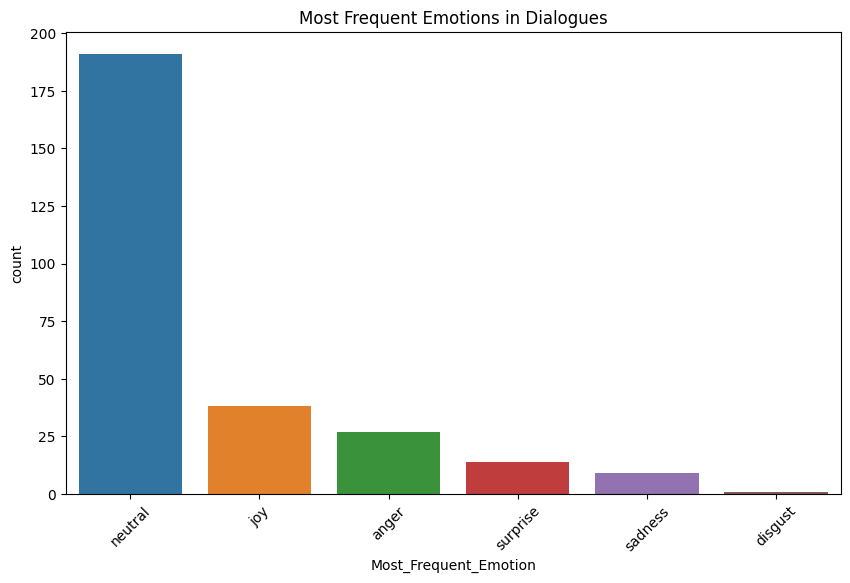

In [ ]:
# most frequent emotions in dialogues
plt.figure(figsize=(10, 6))
sns.countplot(data=dialogue_df, x='Most_Frequent_Emotion', order=dialogue_df['Most_Frequent_Emotion'].value_counts().index)
plt.title('Most Frequent Emotions in Dialogues')
plt.xticks(rotation=45)
plt.show()

### Sentiments

Dialogue_ID
0    positive
1    positive
2    negative
3     neutral
4    positive
Name: Sentiment, dtype: object

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Most_Frequent_Sentiment', ylabel='count'>

Text(0.5, 1.0, 'Most Frequent Sentiment in Dialogues')

(array([0, 1, 2]),
 [Text(0, 0, 'neutral'), Text(1, 0, 'negative'), Text(2, 0, 'positive')])

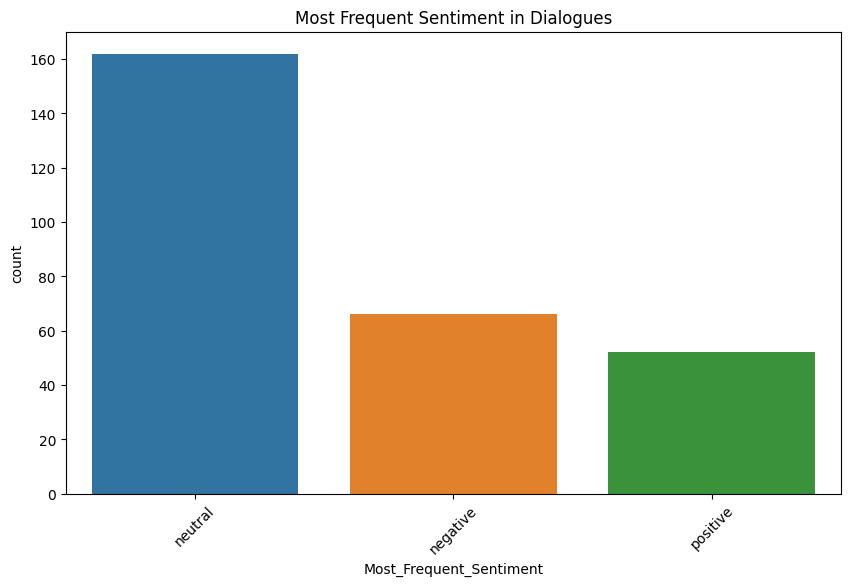

In [ ]:
#Get the most frequent sentiment in each dialogue
dialogue_most_frequent_sentiment = df.groupby('Dialogue_ID')['Sentiment'].agg(lambda x: x.value_counts().idxmax())
dialogue_most_frequent_sentiment[0:5]
df_dialogue_sentiment = pd.DataFrame({'Dialogue_ID':dialogue_most_frequent_sentiment.index,'Most_Frequent_Sentiment':dialogue_most_frequent_sentiment.values})

# most frequent sentiment in dialogues
plt.figure(figsize=(10, 6))
sns.countplot(data=df_dialogue_sentiment, x='Most_Frequent_Sentiment', order=df_dialogue_sentiment['Most_Frequent_Sentiment'].value_counts().index)
plt.title('Most Frequent Sentiment in Dialogues')
plt.xticks(rotation=45)
plt.show()

---

### Utterances per speker

In [ ]:
plot_pdf_box_plot(dialogue_df['avg_utterances_per_speaker'], title='Distribution of Number of Utterances per Speaker in a Dialogue', x_axis_label='Utterances per Speaker', y_axis_label='Frequency')

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='avg_utterances_per_speaker', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Number of Utterances per Speaker in a Dialogue')

Text(0.5, 0, 'Utterances per Speaker')

Text(0, 0.5, 'Frequency')

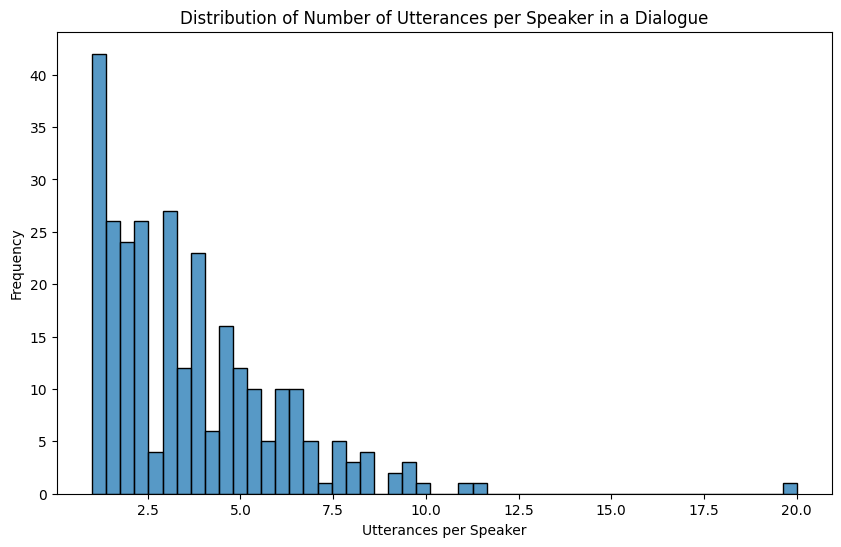

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dialogue_df, x='avg_utterances_per_speaker', bins=50)
plt.title('Distribution of Number of Utterances per Speaker in a Dialogue')
plt.xlabel('Utterances per Speaker')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='avg_utterances_per_speaker'>

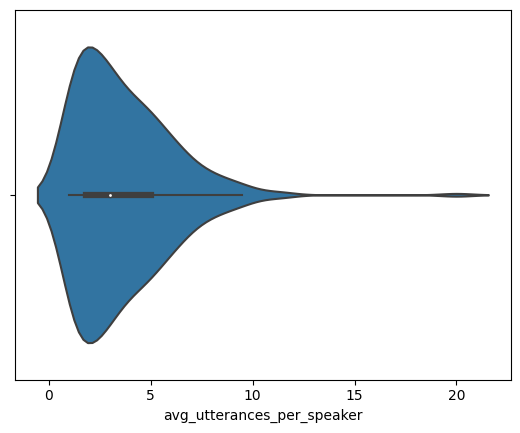

In [ ]:
sns.violinplot(x=dialogue_df.avg_utterances_per_speaker)

<Axes: xlabel='avg_utterances_per_speaker'>

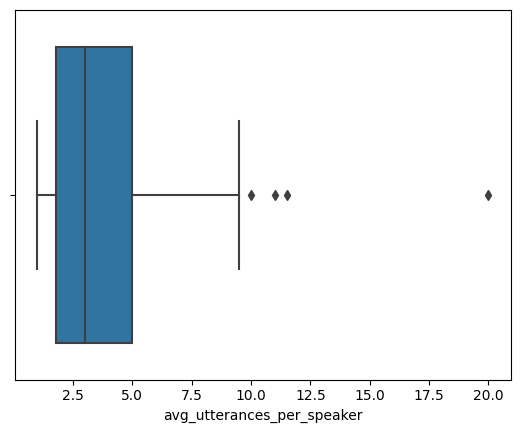

In [ ]:
sns.boxplot(x=dialogue_df.avg_utterances_per_speaker)

# Utterance Level Stats

### Text length

In [ ]:
df.Utterance.describe()

count     2610
unique    2398
top       Hey!
freq        26
Name: Utterance, dtype: object

In [ ]:
df["Utterance_length"] = df["Utterance"].str.len()
df["Utterance_length"].describe()

count    2610.000000
mean       41.926054
std        33.000451
min         2.000000
25%        16.000000
50%        34.000000
75%        60.000000
max       236.000000
Name: Utterance_length, dtype: float64

<Axes: >

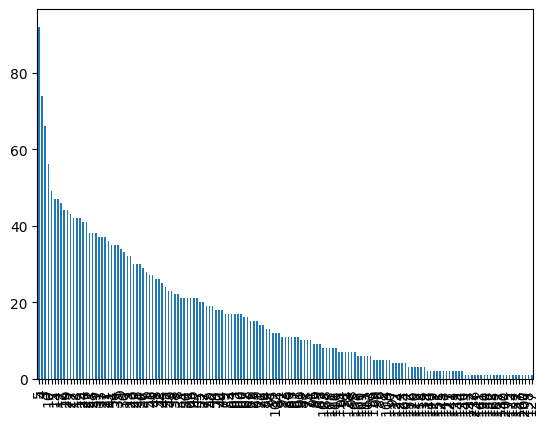

In [ ]:
df['Utterance_length'].value_counts()[:].plot.bar()

In [ ]:
df.Utterance_length.min()

2

### Time

#### Utterance time

In [ ]:
df["Utterance_time"].value_counts()[:].plot()

KeyError: ignored

In [ ]:
print(df["Utterance_time"].info())
print(df["Utterance_time"].describe())

In [ ]:
df['Utterance_time'] = (pd.to_datetime(df.EndTime) - pd.to_datetime(df.StartTime))
df['Utterance_time']

### Emotion -> Sentiment mapping

In [ ]:
# plotting points as a scatter plot
x = df["Emotion"]
y = df["Sentiment"]
plt.scatter(x, y, label= "stars", color= "m",
            marker= "*", s=30)

In [ ]:
print(df['Emotion'].value_counts())
df['Emotion'].value_counts()[:].plot.bar()
# df['Emotion'].value_counts()[:].plot.bar(stacked=True)

### Sentiment count

In [ ]:
print(df['Sentiment'].value_counts())
df['Sentiment'].value_counts()[:].plot.bar()

In [ ]:
``````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````````# let's groupby and plot
d = df.groupby(['Sentiment','Emotion'])['Emotion'].size().unstack()
d.plot(kind='bar',stacked=True,title = "Sentiment and Emotion Division")

In [ ]:
df3 = df.groupby(['Emotion']).count().reset_index().sort_values(['Utterance'], ascending=False)[["Emotion", "Utterance"]]

In [ ]:
df2 = df.groupby(['Emotion']).count()
df2.head()

In [ ]:
# df2 = df.groupby(['Emotion']).count().reset_index().sort_values(['Utterance'], ascending=False)
# df3.plot(kind='pie', y="Utterance",
# figsize=(8,6),
# autopct='%1.1f%%')
# plt.axis('equal')
# # explode = (0, 0, 0,0.1,0.1,0.2,0.3),

In [ ]:
df.groupby(['Sentiment']).count()

In [ ]:
df.groupby(['Sentiment']).count().plot(kind='pie', y='Utterance',
figsize=(8,6),autopct='%1.1f%%')

# Speaker Level Stats

### Personal DF

personal_df;
- [x] person_name
- [x] number of dialogs he/she in
- [x] utt by he/she
- [x] total speech time
- [x] avg. reply time
- [ ] avg. waiting time
- [x] avg. uttr. per dialog
- [ ] all the persons that paired with dialogs
- [x] all emotions he/she shows
- [ ] avg. conti. uttr. span of each emotion

In [ ]:
def get_person_df(df):
    df_copy = df.copy()
    group = df_copy.groupby("Speaker")

    # number of dialogues the person is in
    num_dialogues = group['Dialogue_ID'].nunique()

    # number of utterances the speaker does
    num_utterances = group['Utterance_ID'].count()

    # total speech time
    speech_time = group['seconds'].sum()

    # Average reply(speech) time
    mean_speech_time = group['seconds'].mean()

    # Average utterances per dialogue
    avg_utter_per_dialogue = num_utterances/num_dialogues

    # All emotions they show
    emotions_shown = group['Emotion'].unique()

    # Number of emotions shown
    num_emotions = group['Emotion'].nunique()

    df_final = pd.DataFrame(
        {
            "num_dialogues":num_dialogues,
            "num_utterances":num_utterances,
            'tot_speech_time':speech_time,
            'mean_speech_time':mean_speech_time,
            'avg_utterances_per_dialogue':avg_utter_per_dialogue,
            'emotions_shown':emotions_shown,
            'num_emotions':num_emotions
        }
    )
    return df_final

In [ ]:
speaker_df = get_person_df(dataframe)
speaker_df[5:12]

In [ ]:
df_copy = dataframe.copy()
group = df_copy.groupby("Speaker")

In [ ]:
num = group['Dialogue_ID'].nunique()
num[5:12]

#### Speaker level plots

##### Number of Dialogues

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=speaker_df, x='num_dialogues', bins=50)
plt.title('Distribution of No.Dialogues by speakers')
plt.xlabel('Number of Dialogues')
plt.ylabel('Frequency')
plt.show()

##### Number of utterances

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=speaker_df, x='num_utterances', bins=50)
plt.title('Distribution of No.Utterances by speakers')
plt.xlabel('Number of Dialogues')
plt.ylabel('Frequency')
plt.show()

##### Speech time

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=speaker_df, x='tot_speech_time', bins=50)
plt.title('Distribution of Total Speech Time by speakers')
plt.xlabel('Total Speech Time')
plt.ylabel('Frequency')
plt.show()

##### Number of Emotions Shown by a Single Speaker

In [ ]:
plt.figure(figsize=(10, 6))
# speaker_df.num_emotions.plot(kind='bar')
sns.countplot(data=speaker_df, x='num_emotions')
plt.title('Distribution of Number of Unique Emotions by speakers')
plt.xlabel('Total Unique Emotions Shown')
plt.ylabel('Frequency')
plt.show()

# Emotion Level Stats

## Emotion span

In [ ]:
dfcopy = dataframe.copy()

In [ ]:
# Create a group for all dialogueID, speaker and the emotion
df_with_list = dfcopy.groupby(['Dialogue_ID','Speaker'])['Emotion'].apply(list).reset_index()
df_with_list

,Dialogue_ID,Speaker,Emotion
0,0,Mark,[surprise]
1,0,Rachel,"[anger, neutral]"
2,1,Joey,"[neutral, joy, joy, joy, joy, joy, joy, joy]"
3,2,Rachel,"[neutral, anger]"
4,2,Ross,"[neutral, sadness, surprise, anger, anger, joy..."
...,...,...,...
741,278,Monica,"[joy, surprise, joy, joy, joy, neutral]"
742,278,Phoebe,"[surprise, surprise, neutral, neutral]"
743,279,Monica,"[anger, anger, anger, neutral, anger, neutral,..."
744,279,Rachel,"[anger, anger, neutral, neutral, neutral, neut..."


#### highest consecutive span

In [ ]:
def get_max_consec_terms(test_list):
    count_dict = {item:0 for item in test_list}

    # temporary variable to store the last seen element
    last_seen = None
    count=1
    for emo in test_list:

        # if the occured value was last seen emotion
        if emo == last_seen:

            # update the counter
            count +=1

            # if the count in the dictionary is less than it's occured values
            if count_dict[last_seen]<count:
                # update the value in the dictionary
                count_dict[last_seen]=count
        # if the current emotion is not the previous emotion
        else:
            count=1
            pass
        # set the last seen emotion in current emotion
        last_seen=emo

    # get the maximum value in the dictionary values
    max_value = max(count_dict.values())

    # select all the keys with the maximum value
    max_all_keys =[key for key, val in count_dict.items() if val == max_value]

    # creating the dictionary with the final max values
    consecutive_max = {item:max_value for item in max_all_keys}

    #returning the maximium value with the keys as a dictionary
    return consecutive_max

In [ ]:
# expected output : @nipdep
# from a emotions list
span_dict = {
    'anger': [
        {'count': 2,
         'before': 'joy',
         'after': 'joy'},
        {'count': 10,
         'before': 'neutral',
         'after': 'neutral'}
    ],
    'neutral': [
        {'count': 4,
         'before': 'happy',
         'after': 'happy'},
    ]
}

In [ ]:
# get the maximum span of the emotions as a seperate column
df_with_list["consecutive_emotions"]=df_with_list['Emotion'].apply(lambda row: get_max_consec_terms(row))
df_with_list.head()

,Dialogue_ID,Speaker,Emotion,consecutive_emotions
0,0,Mark,[surprise],{'surprise': 0}
1,0,Rachel,"[anger, neutral]","{'anger': 0, 'neutral': 0}"
2,1,Joey,"[neutral, joy, joy, joy, joy, joy, joy, joy]",{'joy': 7}
3,2,Rachel,"[neutral, anger]","{'neutral': 0, 'anger': 0}"
4,2,Ross,"[neutral, sadness, surprise, anger, anger, joy...","{'neutral': 2, 'anger': 2, 'joy': 2}"


In [ ]:
# add the dictionary values in the column to the list
list_of_max_span_dicts = df_with_list["consecutive_emotions"].values.tolist()

test_list=list_of_max_span_dicts
# create a set of all keys
# from g2g
res = {}
for dic in test_list:
    for key, val in dic.items():
        # checking for key presence and updating max
        if key in res:
            res[key] = max(res[key], val)
        else:
            res[key] = val

# printing result
print("All keys maximum : " + str(res))

All keys maximum : {'surprise': 4, 'anger': 11, 'neutral': 9, 'joy': 7, 'fear': 0, 'disgust': 2, 'sadness': 7}


In [ ]:
new = pd.DataFrame.from_dict([res])
new =new.transpose()
new=new.rename(columns={0: "highest_span"})
# Create a new column with index values
new['Emotion'] = new.index
# new.drop(['index'],axis=1)
new.reset_index()

,index,highest_span,Emotion
0,surprise,4,surprise
1,anger,11,anger
2,neutral,9,neutral
3,joy,7,joy
4,fear,0,fear
5,disgust,2,disgust
6,sadness,7,sadness


#### average consecutive span

In [ ]:
emo_test_list = ["neutral", "sadness","fear", "surprise", "anger", "anger", "joy","anger","anger","neutral","neutral"]

In [ ]:
def get_all_consec_terms(test_list):
    # continuous_count_dict = {item:0 for item in test_list}
    continuous_count_list = []

    # temporary variable to store the last seen element
    last_seen = None
    count=1

    for emo in test_list:
        # if the occured value was last seen emotion
        if emo == last_seen:
            # update the counter
            count +=1
        else:
            continuous_count_list.append({last_seen:count})
            count=1
            pass
        # set the last seen emotion in current emotion
        last_seen=emo

    # Remove the none value
    continuous_count_list.remove({None: 1})
    return continuous_count_list

In [ ]:
dict_list=get_all_consec_terms(emo_test_list) # testing
dict_list

[{'neutral': 1},
 {'sadness': 1},
 {'fear': 1},
 {'surprise': 1},
 {'anger': 2},
 {'joy': 1},
 {'anger': 2}]

In [ ]:
span_count_dict = {item:0 for item in emo_test_list}

keys= span_count_dict.keys()

for key in keys:
    occurance_count=0
    total_span = 0
    # Get the occureance count of each key in the original list
    occurance_count = emo_test_list.count(key)
    for dict_item in dict_list:
        # print("key", key)
        # print(list(dict_item.items())[0][0])
        if list(dict_item.items())[0][0]==key:
            occurance_count+=1
            total_span+=dict_item.get(key)
            span_count_dict[key]=total_span
        else:
            pass
    print("key",key,"total_span,",total_span,"Occurance count",occurance_count)

print(span_count_dict)

key neutral total_span, 1 Occurance count 4
key sadness total_span, 1 Occurance count 2
key fear total_span, 1 Occurance count 2
key surprise total_span, 1 Occurance count 2
key anger total_span, 4 Occurance count 6
key joy total_span, 1 Occurance count 2
{'neutral': 1, 'sadness': 1, 'fear': 1, 'surprise': 1, 'anger': 4, 'joy': 1}


### Before and after emotion

In [ ]:
def get_emo_bfr_after_count(emo_test_list):

    span_dict = {} # output goes here
    current_emotion = None
    count = 0

    for i, emotion in enumerate(emo_test_list):
        if i == 0:
            current_emotion = emotion
            count = 1
        elif emotion != current_emotion:
            if current_emotion not in span_dict:
                span_dict[current_emotion] = []
            span_dict[current_emotion].append({
                'count': count,
                'before': emo_test_list[i - 1],
                'after': emotion
            })
            current_emotion = emotion
            count = 1
        else:
            count += 1

    return span_dict


In [ ]:
def get_emotion_spans(emotion_list: List[str]) -> Dict[str, List]:

    span_dict = {} # output goes here
    # current_emotion = None
    last_seen = None
    count = 1

    for i, emotion in enumerate(emo_test_list):
        # if the occured value was last seen emotion
        if emotion == last_seen:
            # update the counter
            count +=1
        else:
            if emotion not in span_dict:
                span_dict[emotion] = []
            # add the emotion to the list
            #  to check the previous emotion
            if i-1>=0:
                span_dict[emotion].append({
                    'count': count,
                    'before': emo_test_list[i - 1],
                    'after': emotion
                })
            last_seen = emotion
            count = 1
            pass

    return span_dict

In [ ]:
get_emotion_spans(emo_test_list)

{'neutral': [{'count': 1, 'before': 'neutral', 'after': 'neutral'},
  {'count': 2, 'before': 'anger', 'after': 'neutral'}],
 'sadness': [{'count': 1, 'before': 'neutral', 'after': 'sadness'}],
 'fear': [{'count': 1, 'before': 'sadness', 'after': 'fear'}],
 'surprise': [{'count': 1, 'before': 'fear', 'after': 'surprise'}],
 'anger': [{'count': 1, 'before': 'surprise', 'after': 'anger'},
  {'count': 1, 'before': 'joy', 'after': 'anger'}],
 'joy': [{'count': 2, 'before': 'anger', 'after': 'joy'}]}

In [ ]:
df_with_dictionary = df_with_list.copy()
sr_with_dictionary = df_with_dictionary['Emotion'].apply(lambda row: get_emo_bfr_after_count(row))
sr_with_dictionary[0:5][1]

{'anger': [{'count': 1, 'before': 'anger', 'after': 'neutral'}]}

#### Most common emotion

In [ ]:
type(df_with_dictionary)

pandas.core.frame.DataFrame

In [ ]:
df_2 = df.copy()
by_emo = df_2.groupby("Emotion")

## Emotion DF <<<<

- [ ] emotion_df;
    - [x] emotion_name
    - [x] uttr.
    - [x] persons showed
    - [x] dialog that this is the most popular
    - [x] max. cont. span of the emotion
    - [ ] avg. """""
    - [ ]  min. """""
    - [ ] most common emotion after
    - [ ] most common emotion before
    - [ ] most common replying party motion to this
    - [ ] least common emotion after
    - [ ] least common emotion before
    - [ ] least common replying party motion to this

In [ ]:
def df_by_emotion(df):
    df_2 = df.copy()
    by_emo = df_2.groupby("Emotion")

    # number of utterances (lines) per emotion
    no_of_utterances = by_emo.Utterance.size()

    # Total speach time for each emotion
    speech_time = by_emo['Utterance_time'].sum()

    # List of speakers showed the emotion
    speakers = by_emo.Speaker.unique()

    # Number of speakers showed the emotion
    num_speakers = by_emo.Speaker.nunique()

    # unique sentiments
    sentiments = by_emo.Sentiment.unique()

    # number of unique sentiments
    num_sentiments = by_emo.Sentiment.nunique()

    # most common in dialogue
    dialogue_no = by_emo.Dialogue_ID.agg(pd.Series.mode)

    emotion_df = pd.DataFrame(
        {'no_of_utterances': no_of_utterances,
         'speech_time':speech_time,
         'speakers':speakers,
         'num_speakers':num_speakers,
         'sentiments':sentiments,
         "num_sentiments":num_sentiments,
         'most_Frequent_in_dialogue': dialogue_no
         }
        )
    emotion_df['higest_span'] = new['highest_span']
    return emotion_df


In [ ]:
emotion_df = df_by_emotion(dataframe)
emotion_df.head()

# Emotion Analysis

Emotion Transitions:
- transitions between emotions for each speaker's utterance.
  - sudden shifts
  - gradual transitions
  - repeated emotional

Intensity

Emotion Dynamics:
- converge to same
- diverge

Turn-Taking and Emotions:
- emotions change during turn-taking between speakers.
  - does not change during turn-taking
  - changes

Contextual Triggers:
- Specific words, topics, or events trigger emotional changes.

Long-Term Trends:
Speaker-Specific Patterns:

Emotional Resonance:
- speaker's emotion seems to resonate with the other
  - ex: empathetic responses or emotional contagion.

Dialogue Arcs:
Look for narrative arcs within the dialogue. Do emotions follow a rising-falling pattern, similar to a story's structure?

Social Dynamics:
- emotions change in relation to
  - power dynamics
  - social roles
  - relationships

- emotion change with the situation
  certain emotions emerge during moments of
  - conflict
  - agreement
  - negotiation







---
speakers per dialogue
avg of uttarance
gap between two utterences
time taken by speaker to reply
speaker and their emotions/sentiment distribution


We observe that the number of such
emotion shifts in successive utterances of a speaker
in a dialogue is very frequent: 4003, 427, and 1003
in train/dev/test splits, respectively